In [2]:
# Install necessary library
!pip install scikit-surprise

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
from IPython.display import display
import ipywidgets as widgets

In [4]:
# Step 1: Mock Dataset Creation
data = {
    'UserID': [1, 1, 2, 2, 3, 3, 4, 4, 5],
    'ProductID': [101, 102, 101, 103, 104, 105, 101, 106, 107],
    'ProductCategory': ['Electronics', 'Electronics', 'Electronics', 'Books', 'Books', 'Books', 'Electronics', 'Home', 'Fashion'],
    'Rating': [5, 4, 5, 4, 3, 5, 4, 3, 5],
    'PurchaseDate': pd.date_range(start='2023-01-01', periods=9, freq='M')
}
df = pd.DataFrame(data)

<ipython-input-4-87bce1949543>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'PurchaseDate': pd.date_range(start='2023-01-01', periods=9, freq='M')


In [5]:
# Step 2: EDA - Visualizations
def show_visualizations():
    # Distribution of Ratings
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Rating'], bins=5, kde=True, color='blue')
    plt.title('Distribution of Product Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

    # Number of Products per Category
    plt.figure(figsize=(8, 5))
    sns.countplot(x='ProductCategory', data=df, palette='Set2')
    plt.title('Number of Products per Category')
    plt.xlabel('Product Category')
    plt.ylabel('Count')
    plt.show()

    # Ratings by Product Category
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='ProductCategory', y='Rating', data=df, palette='Set3')
    plt.title('Ratings by Product Category')
    plt.xlabel('Product Category')
    plt.ylabel('Rating')
    plt.show()

    # Top Products Rated by Users
    top_products = df['ProductID'].value_counts().head(5)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_products.index, y=top_products.values, palette='muted')
    plt.title('Top 5 Most Rated Products')
    plt.xlabel('Product ID')
    plt.ylabel('Number of Ratings')
    plt.show()

In [7]:
# Step 3: Data Preparation for Recommendations
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['UserID', 'ProductID', 'Rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

# Model Training and Evaluation
model = SVD()
model.fit(trainset)
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)

RMSE: 1.0777


In [8]:
# Step 4: Recommendations
def recommend_products(user_id, model, df, n_recommendations=5):
    all_products = df['ProductID'].unique()
    rated_products = df[df['UserID'] == user_id]['ProductID'].unique()
    unrated_products = [p for p in all_products if p not in rated_products]
    recommendations = [(p, model.predict(user_id, p).est) for p in unrated_products]
    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations[:n_recommendations]

In [9]:
# Widgets for Interaction
user_dropdown = widgets.Dropdown(
    options=df['UserID'].unique(),
    description='Select User ID:',
    value=1
)

recommend_button = widgets.Button(description="Get Recommendations")
output = widgets.Output()

In [14]:
@output.capture()
def on_recommend_button_click(b):
    output.clear_output(wait=True)
    user_id = user_dropdown.value
    top_recommendations = recommend_products(user_id, model, df, n_recommendations=3)
    print(f"Top Recommendations for User {user_id}:")
    for product_id, rating in top_recommendations:
        print(f"Product ID: {product_id}, Predicted Rating: {rating:.2f}")

recommend_button.on_click(on_recommend_button_click)
# Display Widgets
display(user_dropdown, recommend_button, output)

Dropdown(description='Select User ID:', options=(1, 2, 3, 4, 5), value=1)

Button(description='Get Recommendations', style=ButtonStyle())

Output()

Visualizing the Dataset...


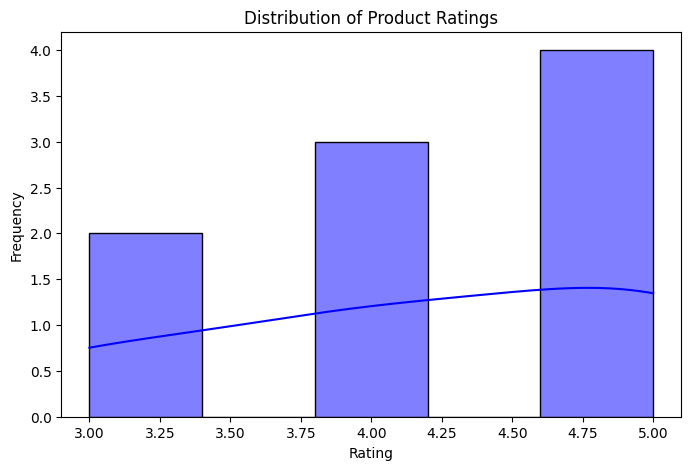

<ipython-input-5-632eee755fe6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ProductCategory', data=df, palette='Set2')


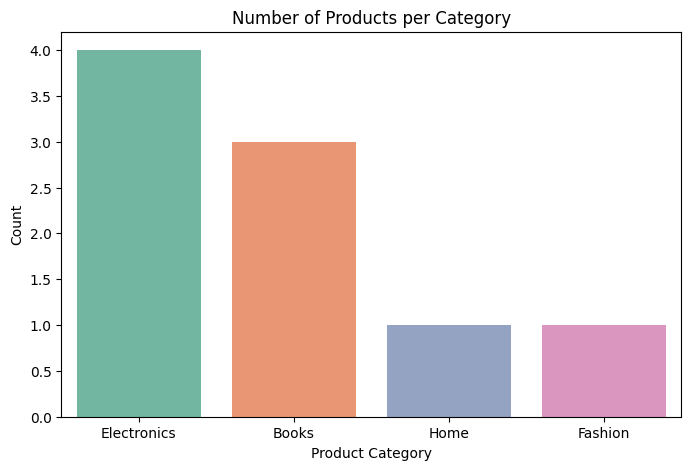

<ipython-input-5-632eee755fe6>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ProductCategory', y='Rating', data=df, palette='Set3')


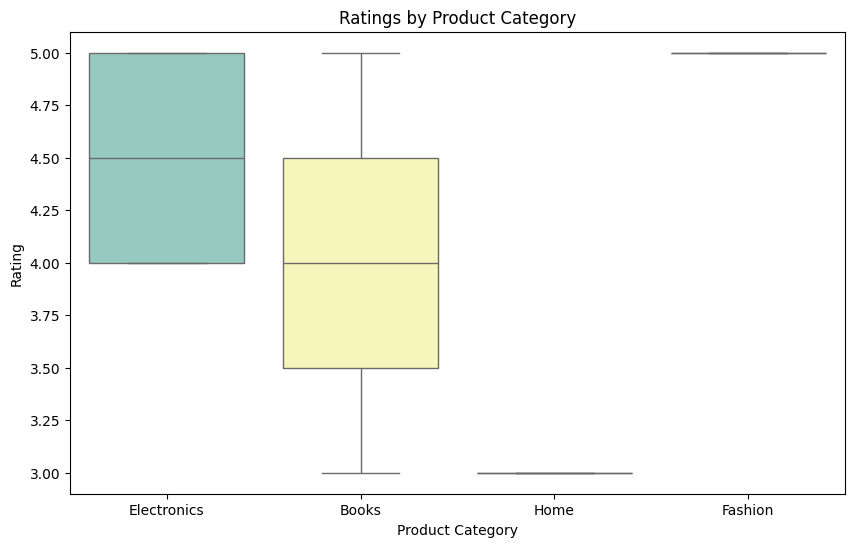

<ipython-input-5-632eee755fe6>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='muted')


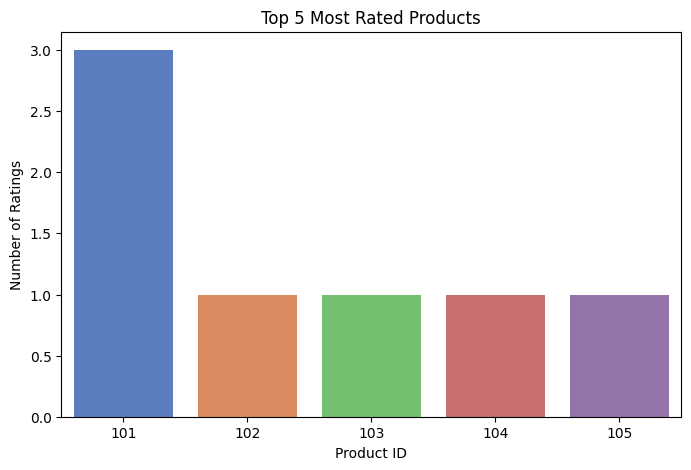

In [15]:
# Show Visualizations
print("Visualizing the Dataset...")
show_visualizations()

In [13]:
print(f"Root Mean Squared Error (RMSE) of the Model: {rmse:.2f}")

Root Mean Squared Error (RMSE) of the Model: 1.08
